In [1]:
from gensim.models import KeyedVectors
import numpy as np
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

In [2]:
# Returning embeddings for enhanced I-tokens from mn to mx age
def get_I_vectors(model, mn, mx):
    vectors = np.zeros(((mx - mn) * 2, model.vector_size))
    vectors[0:(mx - mn) * 2:2] = [model[f'я_ж_{age}'] for age in range(mn, mx)]
    vectors[1:(mx - mn) * 2:2] = [model[f'я_м_{age}'] for age in range(mn, mx)]
    return vectors

In [3]:
orange = '#2A9D8F'
green = '#E76F51'

In [4]:
model_file = 'model'
model = KeyedVectors.load('model.bin', mmap='r').wv

In [5]:
vectors = get_I_vectors(model, 14, 54)

pca = PCA(n_components = 3)
vectors = pca.fit_transform(vectors)

In [6]:
def makeplot(vectors, c1, c2, starting_age, letter, size = 14):
    alpha = list(np.linspace(1, 0.3, len(vectors)))

    for i in range(len(vectors)):
        plt.text(vectors[i, c1], vectors[i, c2], i // 2 + starting_age, color = colors[i % 2], size = size, weight = 'bold', alpha = alpha[i])
    
    plt.xlim(min(vectors[:, c1]) - 1, max(vectors[:, c1]) + 1)
    plt.ylim(min(vectors[:, c2]) - 1, max(vectors[:, c2]) + 1)

    ax = plt.gca()
    ax.spines[['right', 'top']].set_visible(False)

    plt.text(.02, .02, letter, fontsize = 20, transform=ax.transAxes, weight='bold')


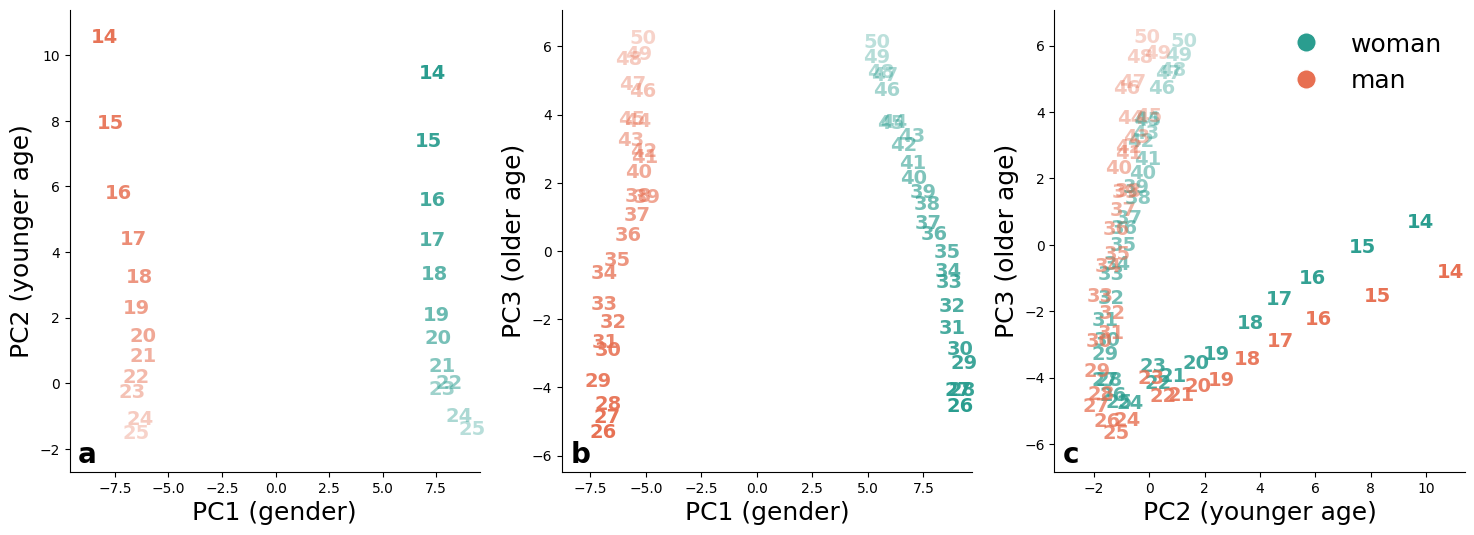

In [7]:
colors = [orange, green]

label_size = 18

plt.figure(figsize = (18, 6))
plt.subplot(131)

makeplot(vectors[:24, :], 0, 2, 14, 'a')

plt.xlabel('PC1 (gender)', size = label_size)
plt.ylabel('PC2 (younger age)', size = label_size)


plt.subplot(132)

makeplot(vectors[24:-6, :], 0, 1, 26, 'b')

plt.xlabel('PC1 (gender)', size = label_size)
plt.ylabel('PC3 (older age)', size = label_size)


plt.subplot(133)

makeplot(vectors[:-6, :], 2, 1, 14, 'c')

plt.xlabel('PC2 (younger age)', size = label_size)
plt.ylabel('PC3 (older age)', size = label_size)

plt.plot([], [], color = 'white', marker = 'o', markerfacecolor=colors[0], markersize = 14, label = 'woman')
plt.plot([], [], color = 'white', marker = 'o', markerfacecolor=colors[1], markersize = 14, label = 'man')
plt.legend(prop = {'size': 18}, frameon = False )
#plt.tight_layout();
#plt.savefig('figure1.pdf')